<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/Randomsample_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/datasets_11657_16098_train.xls')[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [10]:
df.isnull().mean()*100

,0
Age,19.86532
Fare,0.00000
Survived,0.00000


In [11]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train['age_imputed']=x_train['Age']
x_test['age_imputed']=x_test['Age']

In [16]:
x_train['age_imputed'] [x_train['age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['age_imputed'].isnull().sum()).values
x_test['age_imputed'] [x_test['age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['age_imputed'].isnull().sum()).values


/tmp/ipython-input-16-1569267861.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'] [x_train['age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['age_imputed'].isnull().sum()).values
/tmp/ipython-input-16-

In [19]:
x_train.sample(10)

,Age,Fare,age_imputed
706,45.0,13.5000,45.0
745,70.0,71.0000,70.0
693,25.0,7.2250,25.0
409,NaN,25.4667,31.0
671,31.0,52.0000,31.0
8,27.0,11.1333,27.0
189,36.0,7.8958,36.0
94,59.0,7.2500,59.0
744,31.0,7.9250,31.0
345,24.0,13.0000,24.0


In [20]:
print("x_train[age] variance=",x_train['Age'].var())
print("x_train[age_imputed] variance=",x_train['age_imputed'].var())

x_train[age] variance= 210.2517072477438
x_train[age_imputed] variance= 209.61114546828284


<Axes: >

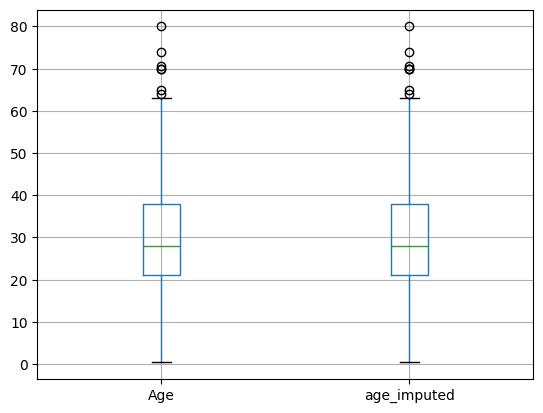

In [21]:
x_train[['Age','age_imputed']].boxplot()